<a href="https://colab.research.google.com/github/Remon19/journey-into-ML/blob/main/cifar2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import torch
import numpy as np
import torch.cuda as cuda
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import PIL as pil
import matplotlib.pyplot as plt


In [6]:
data_path = "/content/dataset/"
cifar10 = datasets.CIFAR10(data_path,train=True,download = True)
cifar10_va = datasets.CIFAR10(data_path,train=False,download = True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting /content/dataset/cifar-10-python.tar.gz to /content/dataset/
Files already downloaded and verified


In [ ]:
print(len(cifar10),len(cifar10_va),sep = ' , ')

In [12]:
img, label = cifar10[99]
print(img, label, )

<PIL.Image.Image image mode=RGB size=32x32 at 0x7F83E274B950> 1


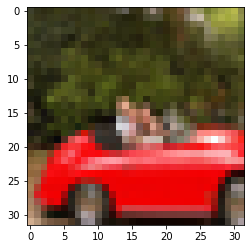

In [19]:
% matplotlib inline 
plt.imshow(img)

In [20]:
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [21]:
cifar10_t = datasets.CIFAR10(data_path, train = True, transform= to_tensor,download = False)
image_t, _ = cifar10_t[99]

In [22]:
type(image_t)

torch.Tensor

In [23]:
image_t.shape , image_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [24]:
imgs = torch.stack([img_t for img_t, _ in cifar10_t], dim = 3)

In [25]:
imgs.shape

torch.Size([3, 32, 32, 50000])

In [27]:
ch_mean =imgs.view(3, -1).mean(dim =1)
ch_stdev = imgs.view(3, -1).std(dim = 1)

In [28]:
ch_mean, ch_stdev

(tensor([0.4914, 0.4822, 0.4465]), tensor([0.2470, 0.2435, 0.2616]))

In [29]:
from torchvision.transforms.transforms import ToTensor
cifar10_t = datasets.CIFAR10(data_path, train = True, transform=transforms.Compose([transforms.ToTensor(),
                                                                                    transforms.Normalize(ch_mean,ch_stdev)]),
                             download = False)

In [30]:
cifar10_val = datasets.CIFAR10(data_path,train= False, download=False,
                               transform=transforms.Compose([transforms.ToTensor(),
                                                             transforms.Normalize(ch_mean,ch_stdev)]))

In [33]:

label_map= {0: 0, 2: 1}
class_names = ['airplane','bird']
cifar2 = [(img, label_map[label]) for 
           img, label in cifar10_t if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for
              img, label in cifar10_val if label in [0, 2]]          

In [34]:
len(cifar2), len(cifar2_val)

(10000, 2000)

In [60]:
from torch.nn.modules.activation import Tanh
n_out = 2
model = nn.Sequential(
    nn.Linear(3072,1024),
    nn.Tanh(),
    nn.Linear(1024,512),
    nn.Tanh(),
    nn.Linear(512,128),
    nn.Tanh(),
    nn.Linear(128,n_out)
)

In [61]:
loss_fn= nn.CrossEntropyLoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(params=model.parameters(),lr= learning_rate)
epochs = 100

In [62]:
train_loader = DataLoader(cifar2, batch_size = 64,
                          shuffle = True)

In [63]:
for epoch in range(epochs):
  for imgs, labels in train_loader:
    batch_size = imgs.shape[0]
    outputs = model(imgs.view(batch_size,-1))
    loss = loss_fn(outputs,labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print(f"Epoch:{epoch} , Loss:{loss}")


Epoch:0 , Loss:0.33032265305519104
Epoch:1 , Loss:0.4928242564201355
Epoch:2 , Loss:0.5067346096038818
Epoch:3 , Loss:0.41548803448677063
Epoch:4 , Loss:0.5529292821884155
Epoch:5 , Loss:0.2657148838043213
Epoch:6 , Loss:0.2926374077796936
Epoch:7 , Loss:0.3827843964099884
Epoch:8 , Loss:0.5227296352386475
Epoch:9 , Loss:0.4564755856990814
Epoch:10 , Loss:0.2710619270801544
Epoch:11 , Loss:0.42933934926986694
Epoch:12 , Loss:0.4174899458885193
Epoch:13 , Loss:0.4906528890132904
Epoch:14 , Loss:0.4066788852214813
Epoch:15 , Loss:0.27618393301963806
Epoch:16 , Loss:0.31264030933380127
Epoch:17 , Loss:0.6754062175750732
Epoch:18 , Loss:0.3258257210254669
Epoch:19 , Loss:0.6469460129737854
Epoch:20 , Loss:0.42166978120803833
Epoch:21 , Loss:0.7276325225830078
Epoch:22 , Loss:0.2698119580745697
Epoch:23 , Loss:0.19324862957000732
Epoch:24 , Loss:0.24201560020446777
Epoch:25 , Loss:0.3878718316555023
Epoch:26 , Loss:0.37763699889183044
Epoch:27 , Loss:0.2722354829311371
Epoch:28 , Loss:0.442

In [64]:
val_loader = DataLoader(cifar2_val, batch_size = 64, shuffle = False)

In [66]:
correct = 0
total = 0

with torch.no_grad():
  for imgs, labels in val_loader:
    batch_size = imgs.shape[0]
    outputs = model(imgs.view(batch_size, -1))
    _, predictions = torch.max(outputs,dim =1)
    total += labels.shape[0]
    correct += int((predictions == labels).sum())

print(f"Accuracy:{correct/total}")

Accuracy:0.811
